In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)
#plt.style.use(['paper.mplstyle'])

In [3]:
n_targets = 8
times = [300]
hand_targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_1E-7/mov_only_soc/hand_targets")
def get_dir(alpha_null, alpha_effort):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_{alpha_null}_{alpha_effort}/ramping_soc/seed_0_mixed"

def hands(dir, i, t):
    idces = [0,2]
    h = np.loadtxt(f'{dir}/hands_{i}_{t}')[:,idces]
    return h - h[0]

def torques(dir, i, t):
    h = np.loadtxt(f'{dir}/torques_{i}_{t}')
    return h

def prep_idx(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            u_prep, u_mov = us[:cutoff+1], us[cutoff+1:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        try : 
            ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
            return ai
        except:
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def input_amount(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def get_prep_idx(us, t):
        return np.sum(us**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        try : 
            ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v


def max_vel(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def get_max_vel(hands):
        vel = np.sqrt(hands[:,1]**2+hands[:,3]**2)
        return np.max(vel)
    def hands(t,i):
        return np.loadtxt(f"{dir}/hands_{i}_{t}")
    def get_all_idces(i):
        try : 
            ai = np.asarray([get_max_vel(hands(t, i)) for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_u(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def cost_u(t, i):
       return np.loadtxt(f'{dir}/u_cost_{i}_{t}')[-1]/lam
    def get_all_idces(i):
        try :
            ai = np.asarray([cost_u(t,i) for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_tgt(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def cost_tgt(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        try:
            ai = np.asarray([cost_tgt(t,i) for t in times])
            return ai
        except: 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v


def mv_loss(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/loss_{i}_{t}').sum()
    def get_all_idces(i):
        try : 
            ai = np.asarray([cost_torques(t,i) for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def successful_reach(lam, t_coeff=1.0):
    dir = get_dir(lam, t_coeff)
    def get_mov_time(mov, tgt):
        end_pos = mov[-100:,:2]
        end_diff = np.linalg.norm(end_pos - tgt, axis=1)
        failures = np.sum(np.where(end_diff> 0.01, 1., 0.))
        return failures
    def get_all_idces(i):
        tgt = hand_targets[i]
        try : 
            ai = np.asarray([get_mov_time(hands(dir, i, t), tgt) for t in times if get_mov_time(hands(dir, i, t), tgt) is not None])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def successful_hold(lam, t_coeff=1.0):
    dir = get_dir(lam, t_coeff)
    def get_torques_prep(i, t):
        max_t = np.max(np.linalg.norm(torques(dir, i, t), axis=1))
        torques_prep = torques(dir, i, t)[:int(t/2),:]
        diff = np.linalg.norm(torques_prep, axis=1)
        failures = np.sum(np.where(diff> 0.02*max_t, 1., 0.))
        return failures
    def get_all_idces(i):
        tgt = hand_targets[i]
        try : 
            ai = np.asarray([get_torques_prep(i,t) for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs if get_all_idces(i) is not None], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

In [4]:
t_coeff = "1.0" 
lam = "0.00001"
m_loss, _ =  mv_loss(lam, t_coeff)
sr, _ = successful_reach(lam, t_coeff)
sh, _ = successful_hold(lam, t_coeff)
print(sr,sh)



[34.28571429] [119.]


## Add a heatmap of what happens for different parameters

In [33]:
t_coeffs = ["1.0", '2.0', "5.0", "6.0", "7.0", "8.0", "9.0"]
# "10.0"]
lambdas = ["0.00000009","0.0000001", "0.0000002", "0.0000003", "0.0000004", "0.0000005", "0.0000006", "0.0000007", "0.0000008", "0.0000009", "0.000001"]
srs = []
shs = []
pis = []
losses = []
tot_us = []
max_vels = []
for tc in t_coeffs :
    srts, shts, pits, losses_ts, tot_uts, max_velts = [], [], [], [], [], []
    for lam in lambdas : 
        print(tc,lam)
        sr, _ = successful_reach(lam, tc)
        sh, _ = successful_hold(lam, tc)
        print(sh)
        sr = np.where(sr > 0, 0, 1)
        sh = np.where(sh > 2, 0, 1)
        pi, _ = prep_idx(lam, tc)
        ml, _ = mv_loss(lam, tc)
        mv, _ = max_vel(lam, tc)
        tot_u, _ = input_amount(lam, tc)
        srts += [sr]
        shts += [sh]
        pits += [pi]
        losses_ts += [ml]
        tot_uts += [tot_u]
        max_velts += [mv]
    srs += [srts]
    shs += [shts]
    pis += [pits]
    max_vels += [max_velts]
    losses += [losses_ts]
    tot_us += [tot_uts]
srs = np.asarray(srs)[:,:,-1]
shs = np.asarray(shs)[:,:,-1]
pis = np.asarray(pis)[:,:,-1]
losses = np.asarray(losses)[:,:,-1]
tot_us = np.asarray(tot_us)[:,:,-1]
max_vels = np.asarray(max_vels)[:,:,-1]

1.0 0.00000009
[5.5]
1.0 0.0000001
[5.25]
1.0 0.0000002
[5.375]
1.0 0.0000003
[8.28571429]
1.0 0.0000004
[7.]
1.0 0.0000005
[7.66666667]
1.0 0.0000006
[7.57142857]
1.0 0.0000007
[8.42857143]
1.0 0.0000008
[10.83333333]
1.0 0.0000009
[14.]
1.0 0.000001
[12.42857143]
2.0 0.00000009
[2.83333333]
2.0 0.0000001
[2.85714286]
2.0 0.0000002
[3.5]
2.0 0.0000003
[4.85714286]
2.0 0.0000004
[6.14285714]
2.0 0.0000005
[6.]
2.0 0.0000006
[7.625]
2.0 0.0000007
[7.42857143]
2.0 0.0000008
[6.85714286]
2.0 0.0000009
[9.66666667]
2.0 0.000001
[7.625]
5.0 0.00000009
[1.5]
5.0 0.0000001
[2.42857143]
5.0 0.0000002
[1.66666667]
5.0 0.0000003
[2.28571429]
5.0 0.0000004
[3.5]
5.0 0.0000005
[4.]
5.0 0.0000006
[3.25]
5.0 0.0000007
[4.42857143]
5.0 0.0000008
[4.5]
5.0 0.0000009
[5.25]
5.0 0.000001
[4.375]
6.0 0.00000009
[1.6]
6.0 0.0000001
[2.]
6.0 0.0000002
[1.75]
6.0 0.0000003
[3.]
6.0 0.0000004
[3.625]
6.0 0.0000005
[3.16666667]
6.0 0.0000006
[3.375]
6.0 0.0000007
[3.42857143]
6.0 0.0000008
[3.625]
6.0 0.00000

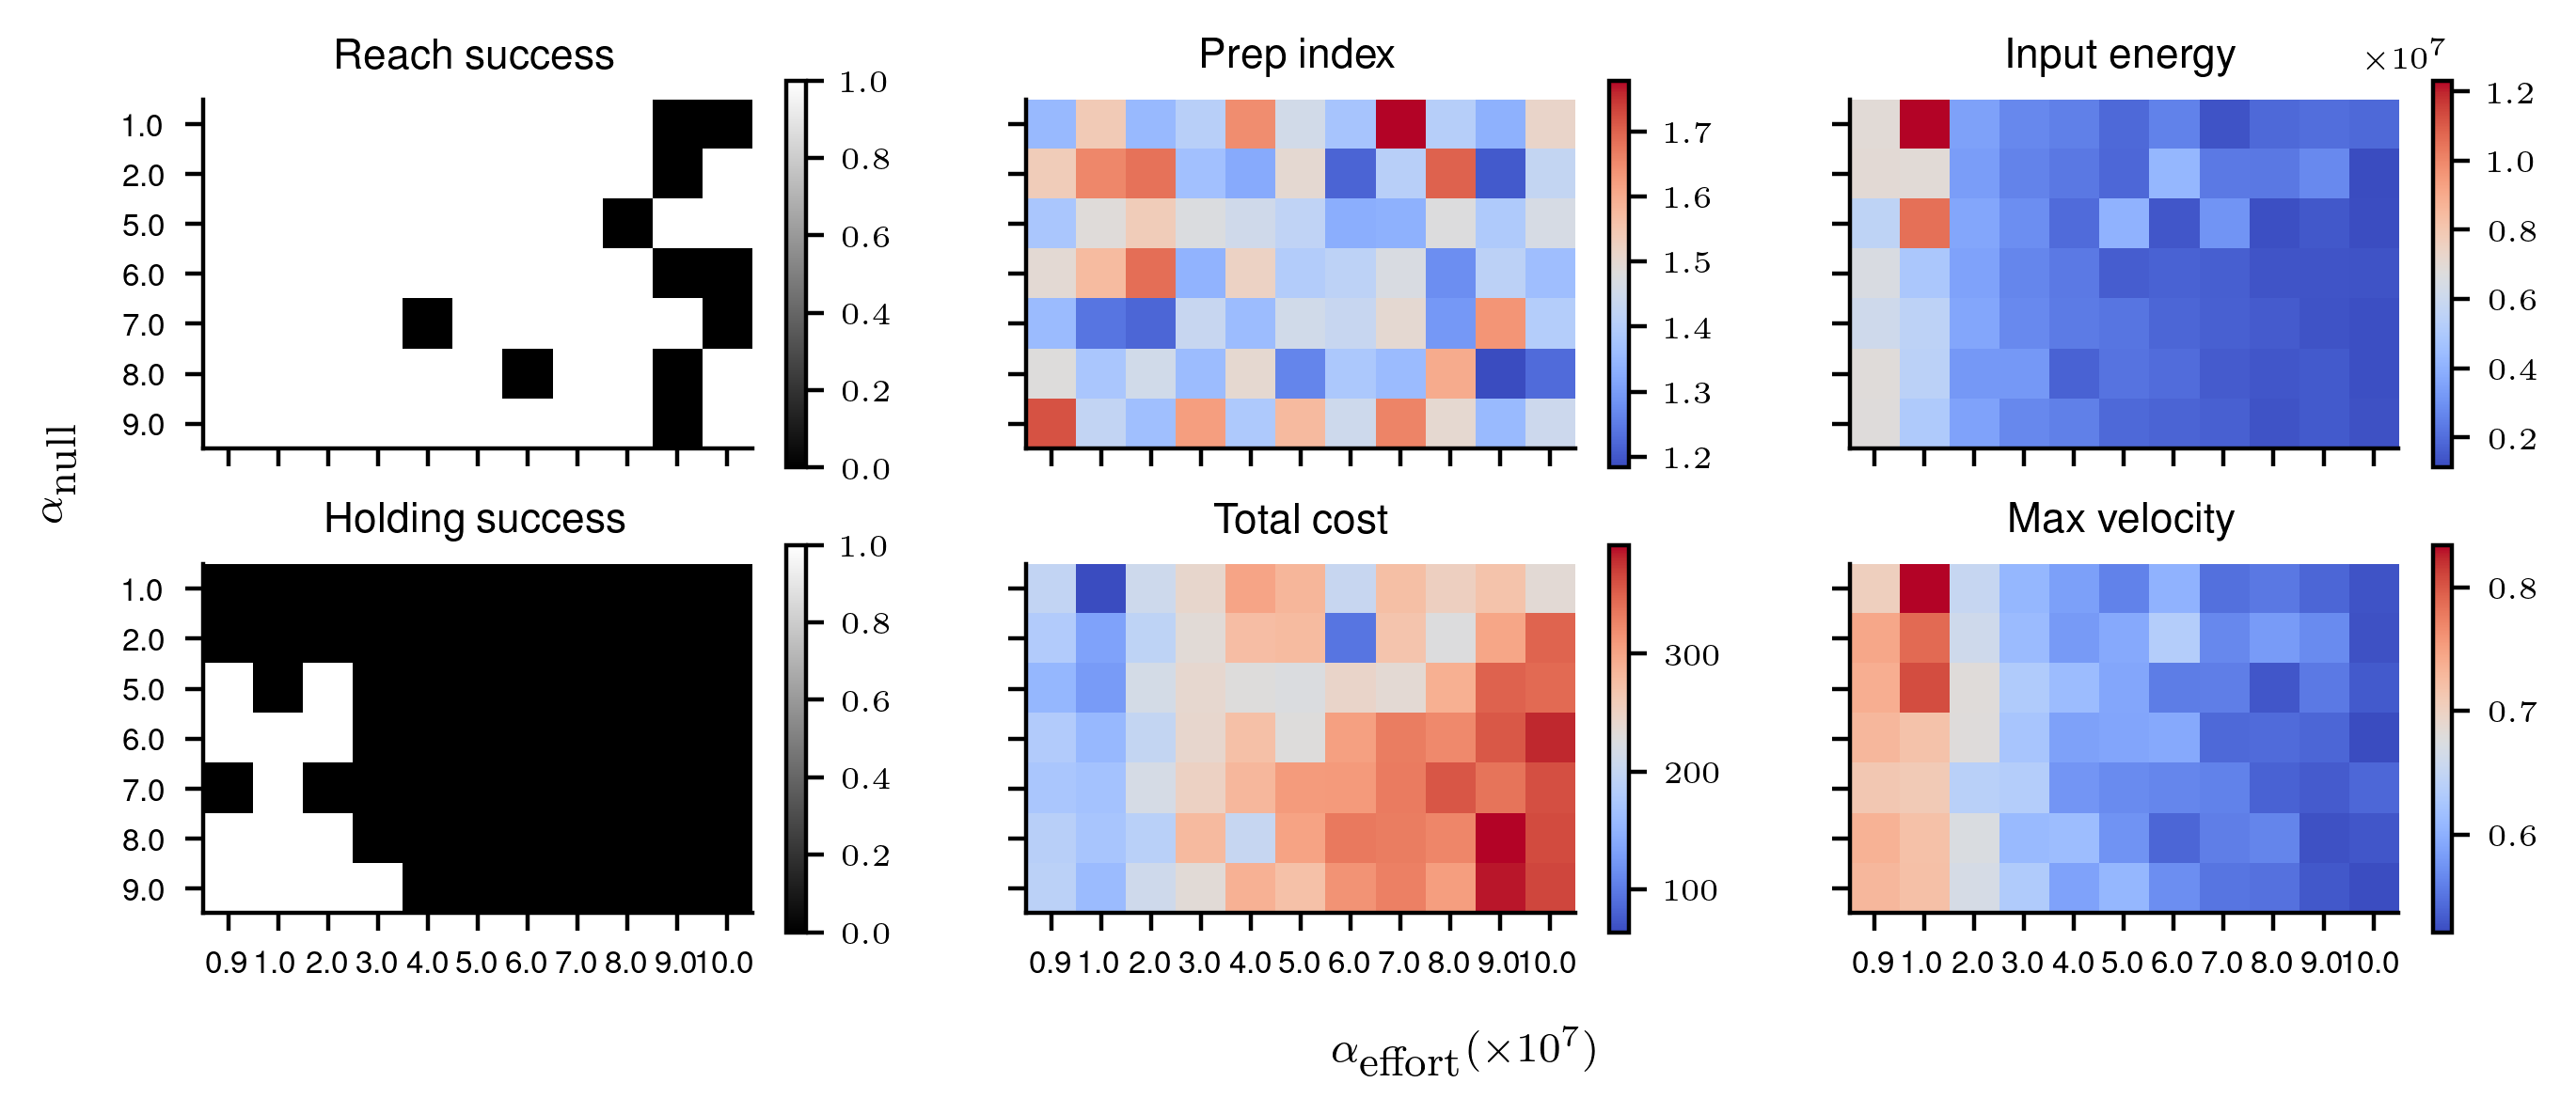

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3,  figsize=(8, 3), dpi = 400)
import matplotlib as mpl
#mpl.rcParams['ticks.size'] = fs_m1
## Successful reach?
#axes[0,0].imshow(srs, cmap = "coolwarm")
p = axes[0,0].imshow(srs, cmap = "gray")
axes[0,0].set_title("Reach success", fontsize = fs)
fig.colorbar(p, ax = axes[0,0])
axes[0,0].set_xticks(range(len(lambdas)), [], fontsize = fs_m1)
axes[0,0].set_yticks(range(len(t_coeffs)), [float(t) for t in t_coeffs], fontsize = fs_m1)
## Successful hold?
p = axes[1,0].imshow(shs, cmap = "gray")
fig.colorbar(p, ax = axes[1,0])
axes[1,0].set_title("Holding success", fontsize = fs)
axes[1,0].set_xticks(range(len(lambdas)), [float(l)*1E7 for l in lambdas], fontsize = fs_m1)
axes[1,0].set_yticks(range(len(t_coeffs)), [float(t) for t in t_coeffs], fontsize = fs_m1)
## Prep index?
p = axes[0,1].imshow(pis, cmap = "coolwarm")
fig.colorbar(p, ax = axes[0,1])
axes[0,1].set_title("Prep index", fontsize = fs)
axes[0,1].set_xticks(range(len(lambdas)),  [])
axes[0,1].set_yticks(range(len(t_coeffs)), [], fontsize = fs_m1)
## Loss
p = axes[1,1].imshow(losses, cmap = "coolwarm")
fig.colorbar(p, ax = axes[1,1])
axes[1,1].set_title("Total cost", fontsize = fs)
axes[1,1].set_xticks(range(len(lambdas)), [float(l)*1E7 for l in lambdas], fontsize = fs_m1)
axes[1,1].set_yticks(range(len(t_coeffs)),  [], fontsize = fs_m1)
## Input amount
p = axes[0,2].imshow(tot_us, cmap = "coolwarm")
fig.colorbar(p, ax = axes[0,2])
axes[0,2].set_title("Input energy", fontsize = fs)
axes[0,2].set_xticks(range(len(lambdas)),  [])
axes[0,2].set_yticks(range(len(t_coeffs)),  [])
## Max velocity
p = axes[1,2].imshow(max_vels, cmap = "coolwarm")
fig.colorbar(p, ax = axes[1,2])
axes[1,2].set_title("Max velocity", fontsize = fs)
axes[1,2].set_xticks(range(len(lambdas)), [float(l)*1E7 for l in lambdas], fontsize = fs_m1)
axes[1,2].set_yticks(range(len(t_coeffs)),  [])

#labels
fig.text(0.5, 0.01, '$\\alpha_{\\textrm{effort}} (\\times 10^{7})$', size = 8)
fig.text(0.07, 0.5, '$\\alpha_{\\textrm{null}}$', size = 8, rotation="vertical")
fig.savefig("hyperparams.pdf", format = "pdf", bbox_inches='tight')

In [35]:
#plot cost target as a function of cost u and of cost null

def cost_torques(lam, t_coeff= 1.0):
    dir = get_dir(lam, t_coeff)
    def cost_torques(t, i):
       c = np.loadtxt(f'{dir}/task_cost_{i}_{t}')
       return c
    def get_all_idces(i):
        try:
            ai = np.asarray([cost_torques(t,i)[0] for t in times])
            return ai
        except : 
            pass
    movs = range(n_targets)
    idces = np.asarray([get_all_idces(i) for i in movs if get_all_idces(i) is not None])
    m, v = np.mean(idces), np.std(idces)/np.sqrt(n_targets)
    return m, v


jus, jnulls, jtgts = [], [], []
alpha_nulls, alpha_effs = [], []
for tc in t_coeffs :
    for lam in lambdas :
        print(tc, lam) 
        ju, _ = input_amount(lam, tc)
        jn, _ = cost_torques(lam, tc)
        jn = jn/float(tc)
        jtgt, _ = cost_tgt(lam, tc)
        jus += [ju]
        jnulls += [jn]
        jtgts += [jtgt]
        alpha_nulls += [tc]
        alpha_effs += [lam]
jus = np.asarray(jus)
jtgts = np.asarray(jtgts)
jnulls = np.asarray(jnulls)
alpha_effs = np.asarray(alpha_effs)
alpha_nulls = np.asarray(alpha_nulls)


1.0 0.00000009
1.0 0.0000001
1.0 0.0000002
1.0 0.0000003
1.0 0.0000004
1.0 0.0000005
1.0 0.0000006
1.0 0.0000007
1.0 0.0000008
1.0 0.0000009
1.0 0.000001
2.0 0.00000009
2.0 0.0000001
2.0 0.0000002
2.0 0.0000003
2.0 0.0000004
2.0 0.0000005
2.0 0.0000006
2.0 0.0000007
2.0 0.0000008
2.0 0.0000009
2.0 0.000001
5.0 0.00000009
5.0 0.0000001
5.0 0.0000002
5.0 0.0000003
5.0 0.0000004
5.0 0.0000005
5.0 0.0000006
5.0 0.0000007
5.0 0.0000008
5.0 0.0000009
5.0 0.000001
6.0 0.00000009
6.0 0.0000001
6.0 0.0000002
6.0 0.0000003
6.0 0.0000004
6.0 0.0000005
6.0 0.0000006
6.0 0.0000007
6.0 0.0000008
6.0 0.0000009
6.0 0.000001
7.0 0.00000009
7.0 0.0000001
7.0 0.0000002
7.0 0.0000003
7.0 0.0000004
7.0 0.0000005
7.0 0.0000006
7.0 0.0000007
7.0 0.0000008
7.0 0.0000009
7.0 0.000001
8.0 0.00000009
8.0 0.0000001
8.0 0.0000002
8.0 0.0000003
8.0 0.0000004
8.0 0.0000005
8.0 0.0000006
8.0 0.0000007
8.0 0.0000008
8.0 0.0000009
8.0 0.000001
9.0 0.00000009
9.0 0.0000001
9.0 0.0000002
9.0 0.0000003
9.0 0.0000004
9.0 0

In [36]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

# plt.style.use(['paper.mplstyle'])
text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



# axes.spines.right   : False
# axes.spines.top     : False
mpl.rcParams['axes.spines.right'] =  False
mpl.rcParams['axes.spines.top'] =  False
# matplotlib.rc('axes.spines.top', set_visible=False)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})



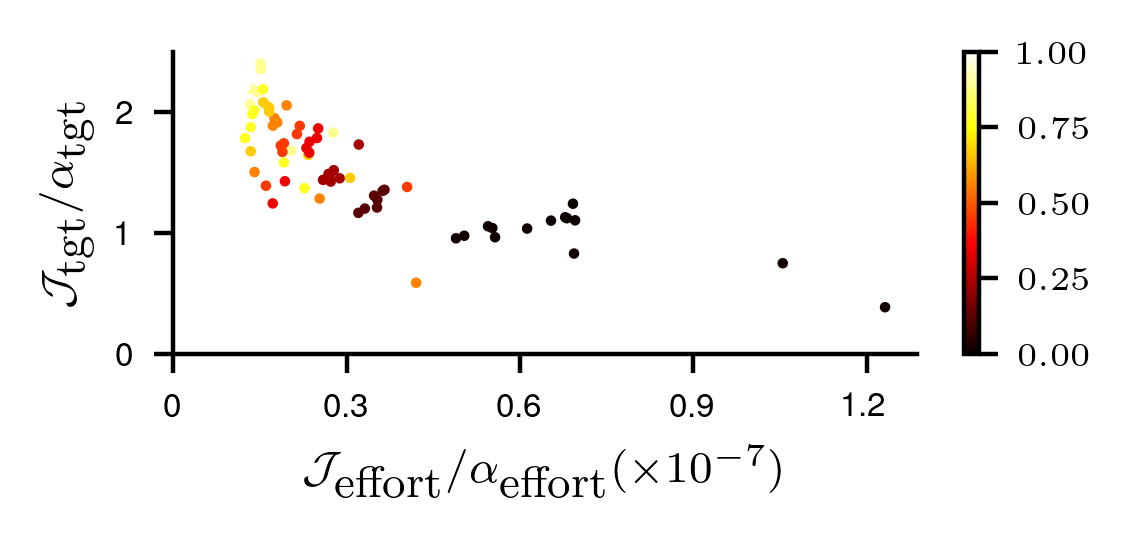

In [39]:
fig, ax = plt.subplots(figsize=(3,1), dpi=400)
palette1 = sns.color_palette("magma", len(t_coeffs))
ts = {t_coeffs[i]: i for i in range(len(t_coeffs))} 
palette0 = sns.color_palette("magma", as_cmap = True)
effs = {lambdas[i]: i for i in range(len(lambdas))} 
ze = np.asarray([float(alpha) for alpha in alpha_effs])
scaled_z = (ze - ze.min()) / ze.ptp()
#scaled_z = ze
colors = plt.cm.hot(scaled_z)
p = ax.scatter(1E-7*jus, jtgts/100, marker='o', s=0.8, c=colors)
ax.set_xlabel("$\\mathcal{J}_{\\textrm{effort}}/\\alpha_{\\textrm{effort}}  (\\times 10^{-7})$")
ax.set_ylabel("$\\mathcal{J}_{\\textrm{tgt}}/\\alpha_{\\textrm{tgt}}$")
ax.set_xticks([0,0.3,0.6, 0.9, 1.2],[0,0.3,0.6, 0.9, 1.2])
ax.set_yticks([0,1,2],[0,1,2])
fig.colorbar(mpl.cm.ScalarMappable(cmap=mpl.cm.hot))
fig.savefig("j_eff_tgt.pdf", format = "pdf", bbox_inches='tight')
# ze = np.asarray([float(alpha) for alpha in alpha_nulls])
# scaled_z = (ze - ze.min()) / ze.ptp()
# p = axes[1].scatter(jnulls, jtgts/100, marker='o',  c=colors)
# fig.colorbar(p, ax = axes[1])

# scaled_z = (z - z.min()) / z.ptp()
# colors = plt.cm.coolwarm(scaled_z)

# plt.scatter(x, y, marker='+', edgecolors=colors, s=150, linewidths=4)
# plt.show()